In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# Analysis of Dataset
In this section, the dataset "Breast Cancer Winconsin" is loaded and will be analyzed. I will be using simple analysis for checking the possible correlation of data to predict whether the breast cancer is Malignant (M) or Benign (B).

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dataset = fetch_ucirepo(id=17)

x = dataset.data.features
y = dataset.data.targets


In [3]:
allDataset = x.copy()
allDataset.insert(0, 'Diagnosis', y)

print('Number of duplicates: ', allDataset.duplicated().sum())
print('Number of nan values: ')
print(allDataset.isna().sum())

Number of duplicates:  0
Number of nan values: 
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


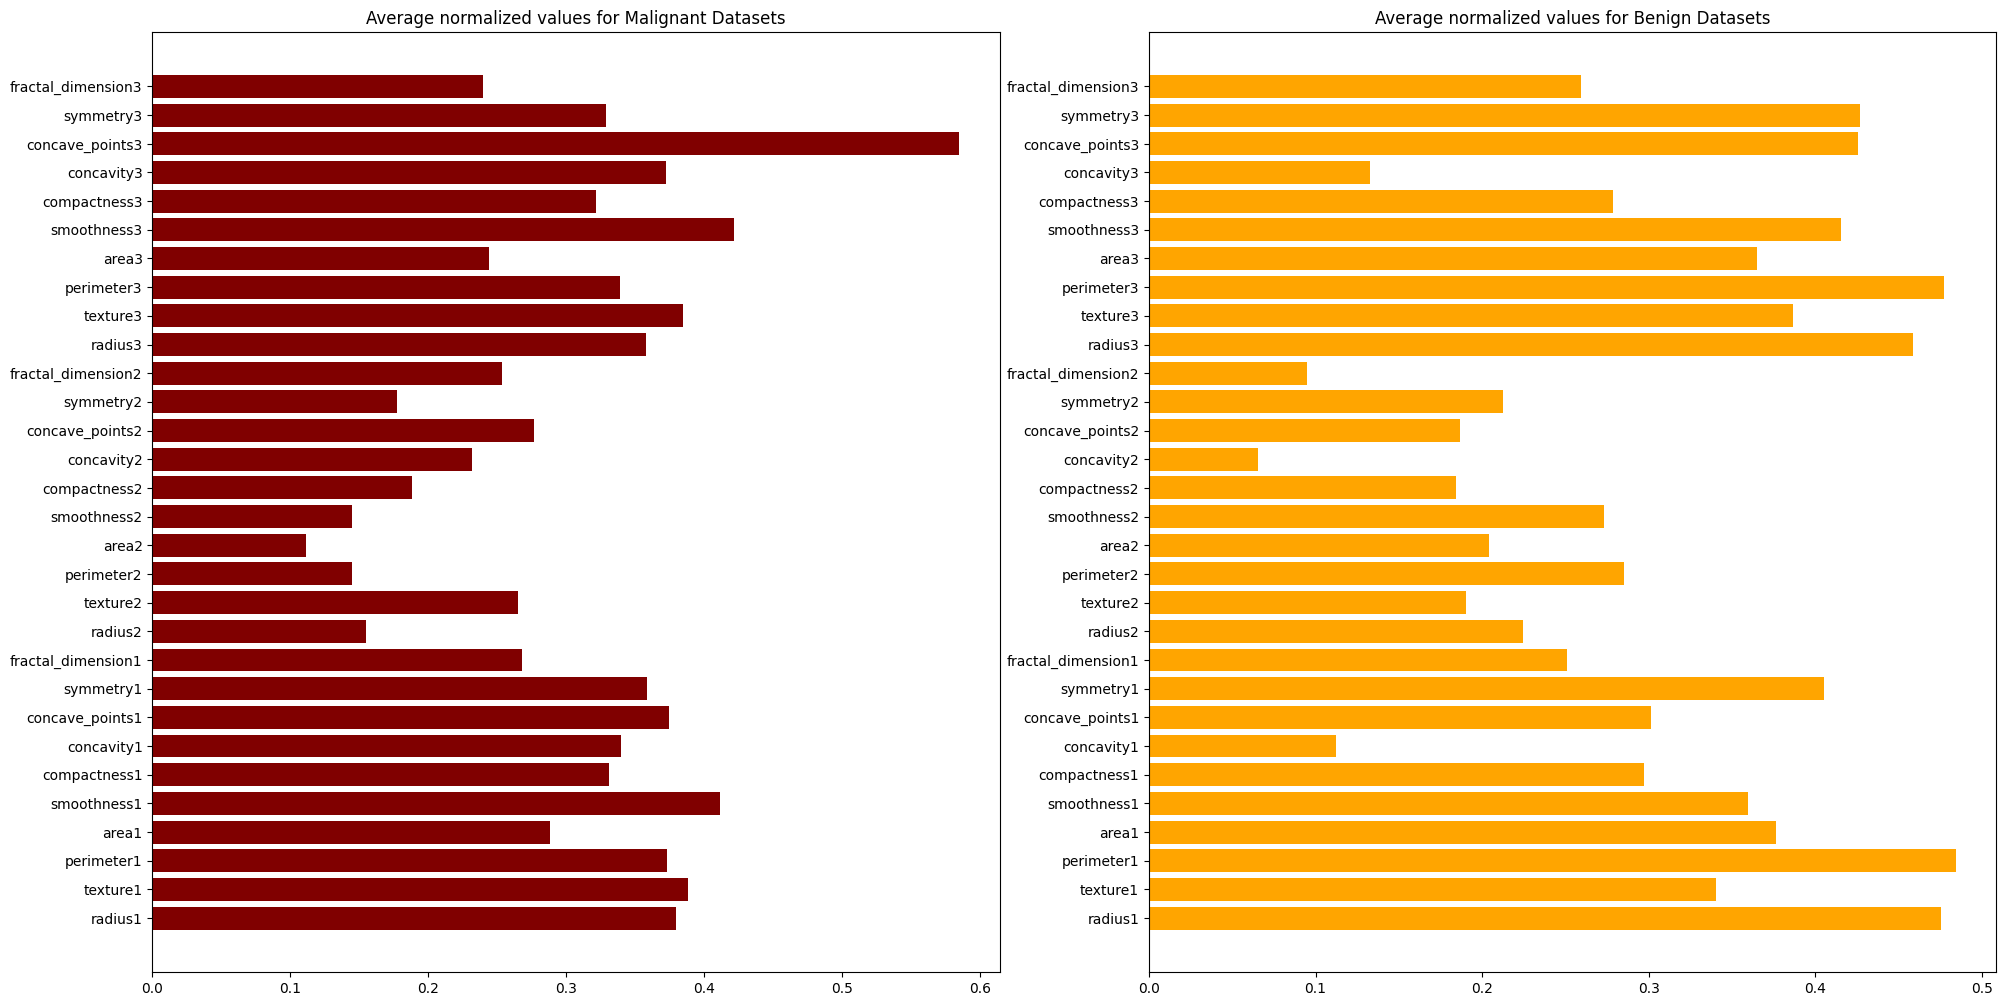

In [4]:
import matplotlib.pyplot as plt

# filter the specific columns
malignantDataset = allDataset[allDataset['Diagnosis'] == 'M']
benignDataset = allDataset[allDataset['Diagnosis'] == 'B']

# remove the categorical indicator
malignantDataset = malignantDataset.drop(columns='Diagnosis')
benignDataset = benignDataset.drop(columns='Diagnosis')

def normalize_column(column):
  return (column - column.min()) / (column.max() - column.min())

malignantDatasetNormalizedIndividual = malignantDataset.apply(normalize_column)
benignDatasetNormalizedIndividual = benignDataset.apply(normalize_column)

# plot using barplot
figure, axis = plt.subplots(ncols=2, figsize=(20, 10))
axis[0].set_title('Average normalized values for Malignant Datasets')
axis[0].barh(malignantDatasetNormalizedIndividual.columns, malignantDatasetNormalizedIndividual.mean(axis=0), color='maroon')

axis[1].set_title('Average normalized values for Benign Datasets')
axis[1].barh(benignDatasetNormalizedIndividual.columns, benignDatasetNormalizedIndividual.mean(axis=0), color='orange')
figure.tight_layout(pad=0.5)


## Train and Test split
In this section we will be spliting the dataset for training and testing. (50-50) for training and testing

In [5]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.5, random_state=120)

# convert to numpy as i am more comfy to work with it
xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

yTrain = yTrain.to_numpy().reshape(-1)
yTest = yTest.to_numpy().reshape(-1)


# Model Training and Evaluation (Raw models)
In this section the following models will be trained and tested to experiment which of the models will perform better for this dataset.

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def getEvaluation(model, xtest):
  yPred = model.predict(xtest)
  return {
    'accuracy': accuracy_score(yTest, yPred),
    'precision': precision_score(yTest, yPred, average='macro'),
    'recall': recall_score(yTest, yPred, average='macro'),
    'f1': recall_score(yTest, yPred, average='macro')
  }

def fastEvaluation(model, xtest, name):
  yPred = model.predict(xtest)
  result = getEvaluation(model, xtest)

  print(f'Accuracy for {name}: ', result['accuracy'])
  print(f'Precision for {name}: ', result['precision'])
  print(f'Recall for {name}: ', result['recall'])
  print(f'F1 Score for {name}: ', result['f1'])


### SVM LINEAR

In [7]:
# experiment with different SVM kernels
SupportVectorLinearModel = SVC(gamma='auto', kernel='linear')
SupportVectorLinearModel.fit(xTrain, yTrain)

fastEvaluation(SupportVectorLinearModel, xTest, 'SVM Linear model')

Accuracy for SVM Linear model:  0.9473684210526315
Precision for SVM Linear model:  0.9453235839790461
Recall for SVM Linear model:  0.9391411967283685
F1 Score for SVM Linear model:  0.9391411967283685


### SVM RBF

In [8]:
SupportVectorRBFModel = SVC(gamma='auto', kernel='rbf')
SupportVectorRBFModel.fit(xTrain, yTrain)

fastEvaluation(SupportVectorRBFModel, xTest, 'SVM RBF model')

Accuracy for SVM RBF model:  0.6456140350877193
Precision for SVM RBF model:  0.32280701754385965
Recall for SVM RBF model:  0.5
F1 Score for SVM RBF model:  0.5


/home/harper/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVM Sigmoid

In [9]:
SupportVectorSigmoidModel = SVC(gamma='auto', kernel='sigmoid')
SupportVectorSigmoidModel.fit(xTrain, yTrain)

fastEvaluation(SupportVectorSigmoidModel, xTest, 'SVM Sigmoid model')

Accuracy for SVM Sigmoid model:  0.6456140350877193
Precision for SVM Sigmoid model:  0.32280701754385965
Recall for SVM Sigmoid model:  0.5
F1 Score for SVM Sigmoid model:  0.5


/home/harper/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Neural Networks (Multi layered Perceptron 5-2)

In [10]:
NNClassifierModel = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
NNClassifierModel.fit(xTrain, yTrain)

fastEvaluation(NNClassifierModel, xTest, 'Neural Network')

Accuracy for Neural Network:  0.6456140350877193
Precision for Neural Network:  0.32280701754385965
Recall for Neural Network:  0.5
F1 Score for Neural Network:  0.5


/home/harper/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Neural Networks (Multi layered Perceptron 6-2)

In [11]:
NNClassifierModel1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 2))
NNClassifierModel1.fit(xTrain, yTrain)

fastEvaluation(NNClassifierModel1, xTest, 'Neural Network')

Accuracy for Neural Network:  0.6456140350877193
Precision for Neural Network:  0.32280701754385965
Recall for Neural Network:  0.5
F1 Score for Neural Network:  0.5


/home/harper/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Neural Networks (Multi layered Perceptron 20-2)

In [12]:
NNClassifierModel2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 2))
NNClassifierModel2.fit(xTrain, yTrain)

fastEvaluation(NNClassifierModel2, xTest, 'Neural Network')

Accuracy for Neural Network:  0.6456140350877193
Precision for Neural Network:  0.32280701754385965
Recall for Neural Network:  0.5
F1 Score for Neural Network:  0.5


/home/harper/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### LogisticRegression

In [13]:
LogisticRegressionModel = LogisticRegression(C=1e5, max_iter=10000, solver='newton-cholesky')
LogisticRegressionModel.fit(xTrain, yTrain)

fastEvaluation(LogisticRegressionModel, xTest, 'LogisticRegression')

Accuracy for LogisticRegression:  0.9719298245614035
Precision for LogisticRegression:  0.9693284545845888
Recall for LogisticRegression:  0.9693284545845888
F1 Score for LogisticRegression:  0.9693284545845888


### Final Result (best)

{'accuracy': 0.9473684210526315, 'precision': 0.9453235839790461, 'recall': 0.9391411967283685, 'f1': 0.9391411967283685}
{'accuracy': 0.6456140350877193, 'precision': 0.32280701754385965, 'recall': 0.5, 'f1': 0.5}
{'accuracy': 0.9719298245614035, 'precision': 0.9693284545845888, 'recall': 0.9693284545845888, 'f1': 0.9693284545845888}


/home/harper/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

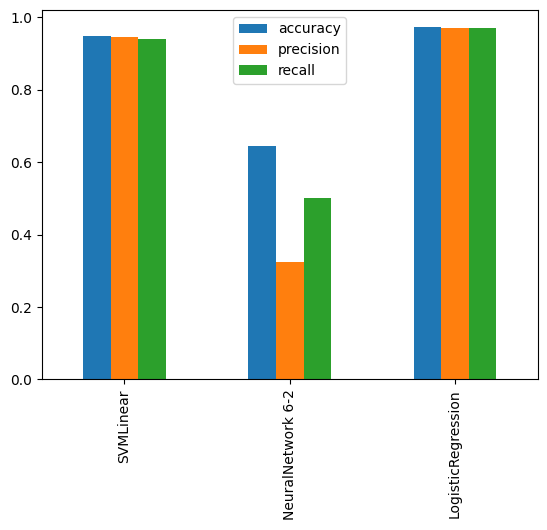

In [14]:
import pandas as pd

SvmLinearTotalScore = getEvaluation(SupportVectorLinearModel, xTest)
NeuralNetworkTotalScore = getEvaluation(NNClassifierModel, xTest)
LogRegTotalScore = getEvaluation(LogisticRegressionModel, xTest)

print(SvmLinearTotalScore)
print(NeuralNetworkTotalScore)
print(LogRegTotalScore)

accuracyScores = [
  SvmLinearTotalScore['accuracy'],
  NeuralNetworkTotalScore['accuracy'],
  LogRegTotalScore['accuracy']
]

precisionScores = [
  SvmLinearTotalScore['precision'],
  NeuralNetworkTotalScore['precision'],
  LogRegTotalScore['precision']
]

recallScores = [
  SvmLinearTotalScore['recall'],
  NeuralNetworkTotalScore['recall'],
  LogRegTotalScore['recall']
]

f1Scores = [
  SvmLinearTotalScore['f1'],
  NeuralNetworkTotalScore['f1'],
  LogRegTotalScore['f1']
]

index = ['SVMLinear', 'NeuralNetwork 6-2', 'LogisticRegression']
dataFrame = pd.DataFrame({
  'accuracy': accuracyScores,
  'precision': precisionScores,
  'recall': recallScores
}, index=index)
dataFrame.plot.bar()

# Further model improvement?
- Use of ensemble
- Use of Normalization techniques

In [15]:
from sklearn.ensemble import VotingClassifier

estimator = [
  ('svmBest', SupportVectorLinearModel),
  ('NNClass', NNClassifierModel2),
  ('LogReg', LogisticRegressionModel)
]

Ensemble = VotingClassifier(estimator, voting='hard')
Ensemble.fit(xTrain, yTrain)

fastEvaluation(Ensemble, xTest, 'Ensemble')

Accuracy for Ensemble:  0.9508771929824561
Precision for Ensemble:  0.9526315789473684
Recall for Ensemble:  0.9396254842875592
F1 Score for Ensemble:  0.9396254842875592


In [16]:
# simple normalization technique
xNormalized = x.copy()
xnTrain, xnTest, ynTrain, ynTest = train_test_split(xNormalized, y, test_size=0.5, random_state=120)

ynTrain = ynTrain.to_numpy().reshape(-1)
ynTest = ynTest.to_numpy().reshape(-1)

xNormalized = xNormalized.apply(normalize_column)

EnsembleNormalized = VotingClassifier(estimator, voting='hard')
EnsembleNormalized.fit(xnTrain, ynTrain)

fastEvaluation(EnsembleNormalized, xnTest, 'Ensemble Normalized')

Accuracy for Ensemble Normalized:  0.9508771929824561
Precision for Ensemble Normalized:  0.9526315789473684
Recall for Ensemble Normalized:  0.9396254842875592
F1 Score for Ensemble Normalized:  0.9396254842875592


SVM Linear:  {'accuracy': 0.9473684210526315, 'precision': 0.9453235839790461, 'recall': 0.9391411967283685, 'f1': 0.9391411967283685}
NeuralNetwork (5-2) :  {'accuracy': 0.6456140350877193, 'precision': 0.32280701754385965, 'recall': 0.5, 'f1': 0.5}
LogisticRegression {'accuracy': 0.9719298245614035, 'precision': 0.9693284545845888, 'recall': 0.9693284545845888, 'f1': 0.9693284545845888}
Ensemble {'accuracy': 0.9508771929824561, 'precision': 0.9526315789473684, 'recall': 0.9396254842875592, 'f1': 0.9396254842875592}


/home/harper/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

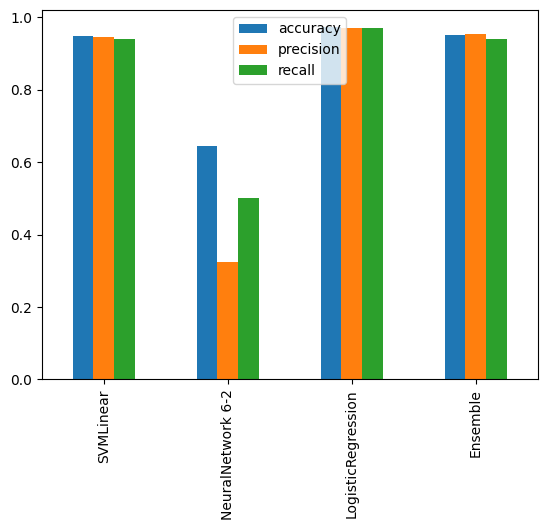

In [17]:
import pandas as pd

SvmLinearTotalScore = getEvaluation(SupportVectorLinearModel, xTest)
NeuralNetworkTotalScore = getEvaluation(NNClassifierModel, xTest)
LogRegTotalScore = getEvaluation(LogisticRegressionModel, xTest)
EnsembleTotalScore = getEvaluation(Ensemble, xTest)

print('SVM Linear: ', SvmLinearTotalScore)
print('NeuralNetwork (5-2) : ', NeuralNetworkTotalScore)
print('LogisticRegression', LogRegTotalScore)
print('Ensemble', EnsembleTotalScore)

accuracyScores = [
  SvmLinearTotalScore['accuracy'],
  NeuralNetworkTotalScore['accuracy'],
  LogRegTotalScore['accuracy'],
  EnsembleTotalScore['accuracy'],
]

precisionScores = [
  SvmLinearTotalScore['precision'],
  NeuralNetworkTotalScore['precision'],
  LogRegTotalScore['precision'],
  EnsembleTotalScore['precision'],
]

recallScores = [
  SvmLinearTotalScore['recall'],
  NeuralNetworkTotalScore['recall'],
  LogRegTotalScore['recall'],
  EnsembleTotalScore['recall']
]

f1Scores = [
  SvmLinearTotalScore['f1'],
  NeuralNetworkTotalScore['f1'],
  LogRegTotalScore['f1'],
  EnsembleTotalScore['f1']
]

index = ['SVMLinear', 'NeuralNetwork 6-2', 'LogisticRegression', 'Ensemble']
dataFrame = pd.DataFrame({
  'accuracy': accuracyScores,
  'precision': precisionScores,
  'recall': recallScores
}, index=index)

dataFrame.plot.bar()